In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

### Датасет для прогнозирования возраста морского ушка от физических размеров

Колонки датасета:

- Sex - nominal - M, F, and I (infant)

- Length - continuous - mm - Longest shell measurement

- Diameter - continuous - mm - perpendicular to length

- Height - continuous - mm - with meat in shell

- Whole weight - continuous - grams - whole abalone

- Shucked weight - continuous - grams - weight of meat

- Viscera weight - continuous - grams - gut weight (after bleeding)

- Shell weight - continuous - grams - after being dried

- Rings - integer - +1.5 gives the age in years (target)

In [2]:
df = pd.read_csv('data/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Общее исследование данных

In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Sex                0
Length             0
Diameter          99
Height             0
Whole weight      99
Shucked weight     0
Viscera weight     0
Shell weight      50
Rings              0
dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
43,I,0.205,0.150,0.055,NaN,0.0255,0.0150,0.012,5
64,M,0.520,NaN,0.120,0.5800,0.2340,0.1315,0.185,8
102,M,0.530,0.435,0.160,NaN,0.3160,0.1640,0.335,15
127,I,0.385,NaN,0.085,0.2505,0.1120,0.0610,0.080,8
...,...,...,...,...,...,...,...,...,...
4128,M,0.555,0.435,0.145,NaN,0.4040,0.2275,0.255,8
4138,M,0.630,0.490,0.155,NaN,0.5350,0.2900,0.335,11
4143,F,0.655,NaN,0.220,1.3590,0.6420,0.3255,0.405,13
4163,I,0.390,NaN,0.085,0.3440,0.1810,0.0695,0.079,7


In [10]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3935 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3935 non-null   object 
 1   Length          3935 non-null   float64
 2   Diameter        3935 non-null   float64
 3   Height          3935 non-null   float64
 4   Whole weight    3935 non-null   float64
 5   Shucked weight  3935 non-null   float64
 6   Viscera weight  3935 non-null   float64
 7   Shell weight    3935 non-null   float64
 8   Rings           3935 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 307.4+ KB


In [11]:
df_clean.Sex.unique()

array(['M', 'F', 'I', 'f'], dtype=object)

In [12]:
df_clean['Sex']= df_clean['Sex'].apply(lambda x: 'F' if x == 'f' else x)
df_clean.Sex.unique()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_195/2358443153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex']= df_clean['Sex'].apply(lambda x: 'F' if x == 'f' else x)


array(['M', 'F', 'I'], dtype=object)

In [13]:
df_clean.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [14]:
df_clean.shape

(3935, 9)

In [15]:
df_clean['Age'] = df['Rings'].apply(lambda x: x + 1.5)
df_clean.head()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_195/3361867032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = df['Rings'].apply(lambda x: x + 1.5)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


### Однофакторный анализ

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_195/2303620777.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean.hist(ax=ax)


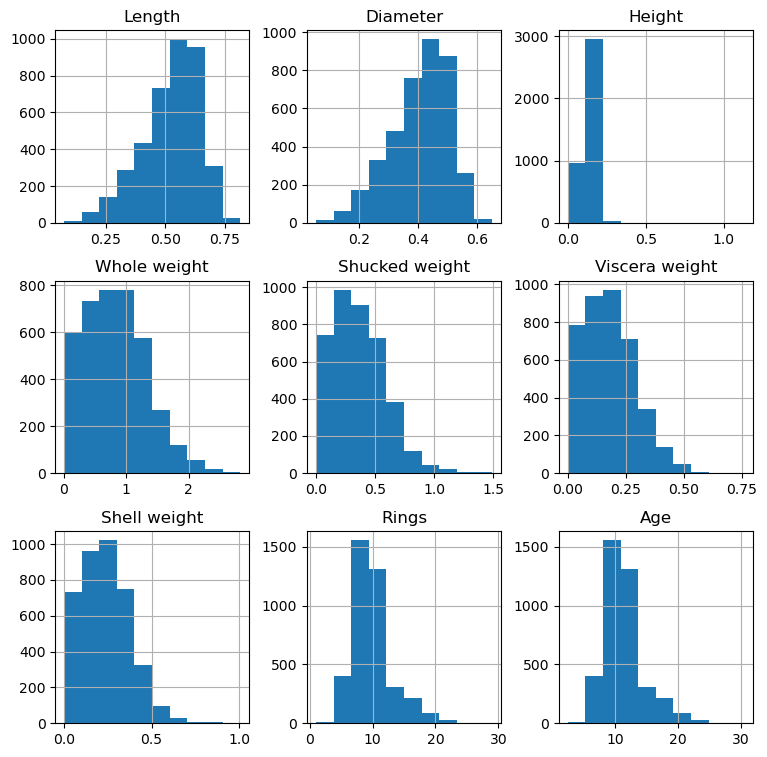

In [33]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca()
df_clean.hist(ax=ax)
plt.show()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_195/1073590910.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean[df_clean['Sex']=='M'].hist(ax=ax)


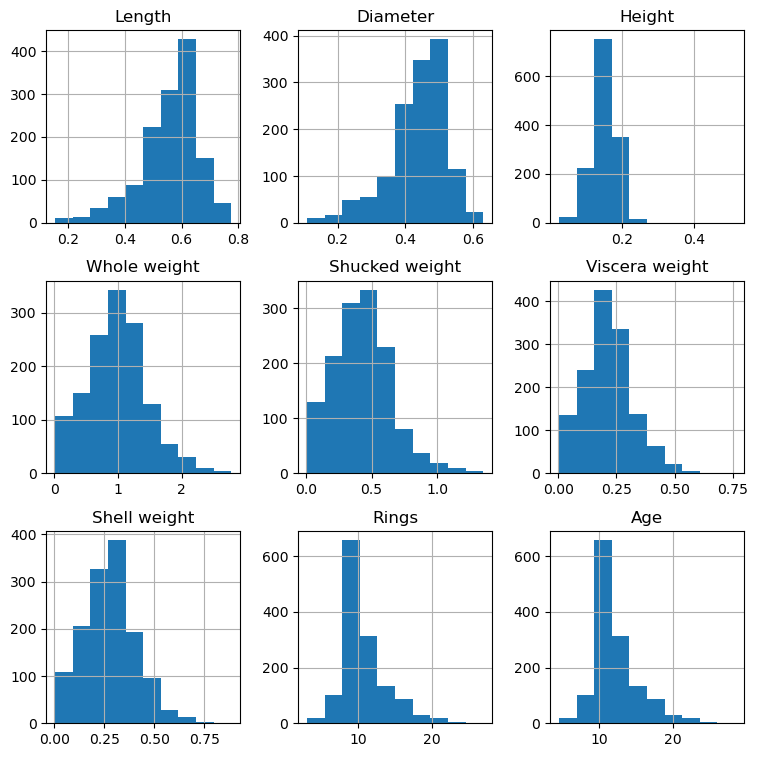

In [34]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca()
df_clean[df_clean['Sex']=='M'].hist(ax=ax)
plt.show()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_195/2522739738.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean[df_clean['Sex']=='F'].hist(ax=ax)


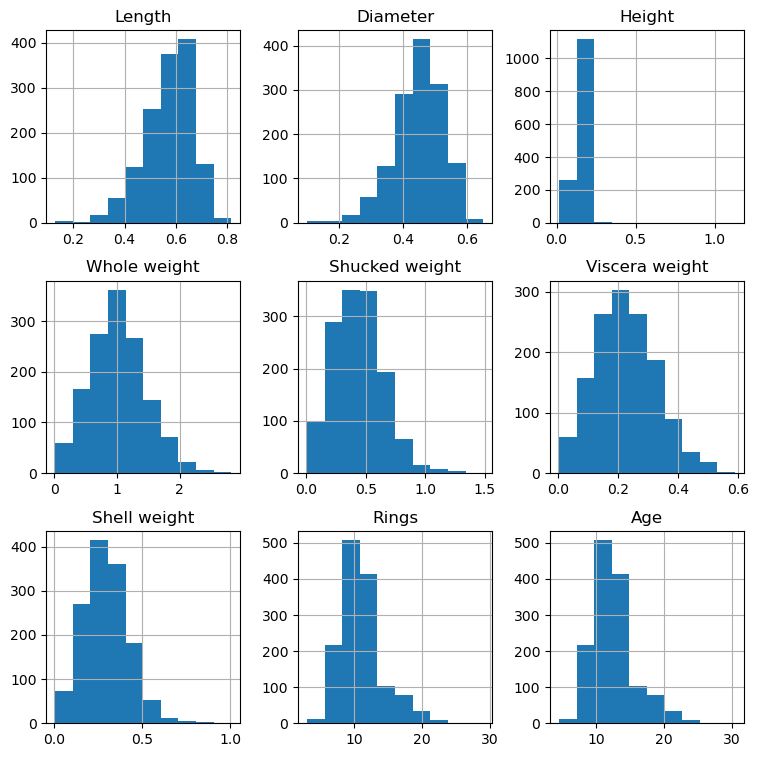

In [35]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca()
df_clean[df_clean['Sex']=='F'].hist(ax=ax)
plt.show()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_195/575641855.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean[df_clean['Sex']=='I'].hist(ax=ax)


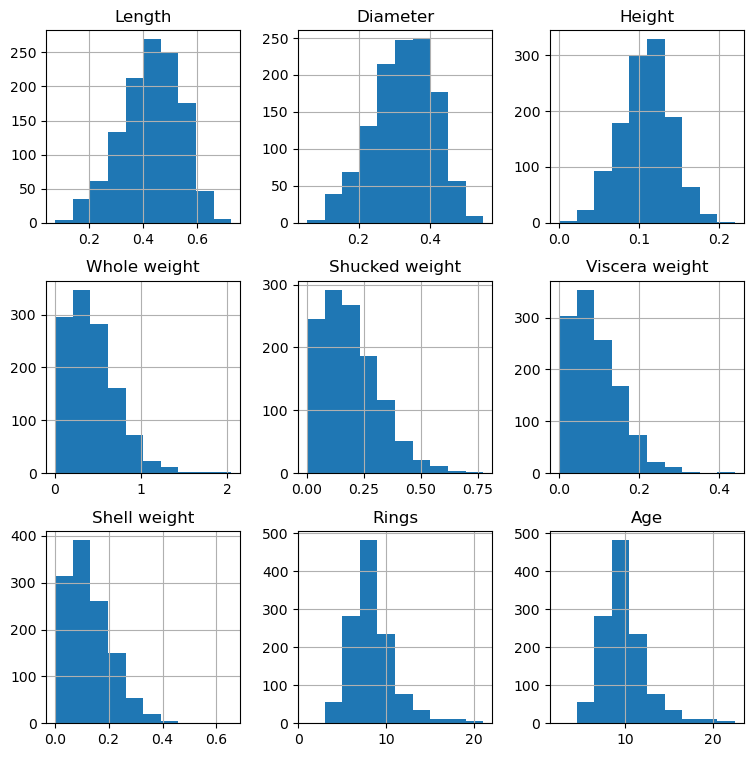

In [36]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca()
df_clean[df_clean['Sex']=='I'].hist(ax=ax)
plt.show()

In [40]:
df_clean.groupby('Sex').agg(
    LengthMean=('Length', 'mean'),
    LengthMedian=('Length', 'median')
).sort_values('LengthMean', ascending=False)

,LengthMean,LengthMedian
Sex,,
F,0.572698,0.585
M,0.559516,0.580
I,0.427481,0.435
